## Performing some EDA to inform modeling approach

### Let's group directors based on average film revenue:

In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/workspace/DS3001-Project1/Data/movie_dataset.csv')

# Group by director and calculate average revenue
average_revenue_by_director = df.groupby('director')['revenue'].mean()

# Sort directors by average revenue in descending order and select the top 20
top_20_directors = average_revenue_by_director.sort_values(ascending=False).head(20)

# Print the result
pd.set_option('display.float_format', '{:,.0f}'.format)
print(top_20_directors)



director
Chris Buck         1,274,219,009
Kyle Balda         1,156,730,962
Lee Unkrich        1,066,969,703
Joss Whedon          987,943,689
Chris Renaud         875,958,308
James Cameron        840,509,920
Roger Allers         788,241,776
Tim Miller           783,112,979
Colin Trevorrow      758,768,301
Robert Stromberg     758,539,785
Pierre Coffin        757,137,935
Dan Scanlon          743,559,607
David Yates          742,971,665
Peter Jackson        722,071,424
Pete Docter          718,508,837
Chris Miller         676,972,821
George Lucas         667,822,779
Carlos Saldanha      633,112,948
Jan Pinkava          623,722,818
Shane Black          615,612,571
Name: revenue, dtype: float64


In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/workspace/DS3001-Project1/Data/movie_dataset.csv')

# Group by director and calculate average revenue
average_revenue_by_director = df.groupby('director')['revenue'].mean()

# Sort directors by average revenue in descending order and select ranks 20 to 40
directors_20_to_40 = average_revenue_by_director.sort_values(ascending=False).iloc[20:40]

# Print the result with full numbers and commas
pd.set_option('display.float_format', '{:,.0f}'.format)
print(directors_20_to_40)


director
Dean DeBlois          609,123,048
Jennifer Yuh Nelson   593,431,553
Byron Howard          591,794,936
Francis Lawrence      590,491,436
Richard Marquand      572,700,000
Steve Martino         561,738,948
Alan Taylor           542,587,470
Brenda Chapman        538,983,207
Christopher Nolan     528,435,404
Andrew Stanton        527,261,339
David Silverman       527,068,851
Andrew Adamson        521,371,889
Marc Webb             506,218,674
Anthony Russo         499,625,609
Michael Bay           486,043,720
Chris Williams        481,042,718
John Lasseter         473,189,112
Rich Moore            471,222,889
Gore Verbinski        453,859,051
Conrad Vernon         423,061,254
Name: revenue, dtype: float64


In [9]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/workspace/DS3001-Project1/Data/movie_dataset.csv')

# Group by director and calculate average revenue
average_revenue_by_director = df.groupby('director')['revenue'].mean()

# Sort directors by average revenue in descending order and select ranks 20 to 40
directors_40_to_60 = average_revenue_by_director.sort_values(ascending=False).iloc[40:60]

# Print the result with full numbers and commas
pd.set_option('display.float_format', '{:,.0f}'.format)
print(directors_40_to_60)

director
Eric Darnell          420,472,746
Chris Sanders         408,609,738
Jon Favreau           403,142,372
Alfonso Cuar\u00f3n   402,443,426
Rupert Sanders        396,600,000
Brad Bird             389,617,275
Sam Mendes            387,649,830
J.J. Abrams           377,747,923
Roland Emmerich       369,602,630
Mark Osborne          364,657,905
Phyllida Lloyd        362,399,168
Rob Marshall          356,292,277
Ralph Zondag          354,248,063
Zack Snyder           353,742,484
Bryan Singer          351,029,375
Fergal Reilly         349,779,543
Irvin Kershner        349,200,000
Mike Gabriel          346,079,773
Joseph Kosinski       343,115,668
Steven Spielberg      338,792,339
Name: revenue, dtype: float64


## Genres

In [18]:
import pandas as pd

# Combine all genre entries into a single string and split into individual words
all_words = ' '.join(df['genres'].dropna()).split()

# Get unique words using a set
unique_words = set(all_words)

# Print the unique words
for word in unique_words:
    print(word)



Foreign
Drama
Mystery
Western
Comedy
Movie
Horror
Action
Music
Fiction
Fantasy
Family
Romance
Adventure
History
Animation
Documentary
War
Science
Crime
Thriller
TV


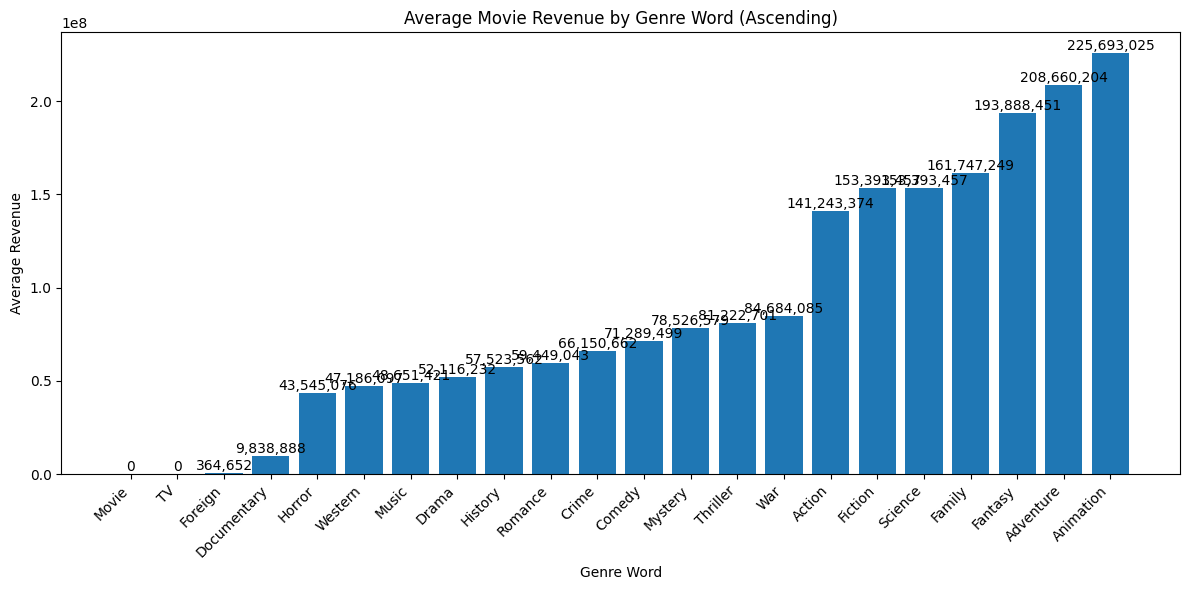

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine all genre entries into a single string and split into individual words
all_words = ' '.join(df['genres'].dropna()).split()

# Get unique words using a set
unique_words = set(all_words)

# Calculate average revenue for movies containing each unique genre word
average_revenue_per_word = {}

for word in unique_words:
    # Filter movies that contain the word in their genre
    filtered_movies = df[df['genres'].str.contains(word, na=False)]
    
    # Calculate the average revenue for these movies
    average_revenue = filtered_movies['revenue'].mean()
    average_revenue_per_word[word] = average_revenue

# Sort the dictionary by average revenue in ascending order
sorted_revenue = dict(sorted(average_revenue_per_word.items(), key=lambda item: item[1]))

# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_revenue.keys(), sorted_revenue.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre Word')
plt.ylabel('Average Revenue')
plt.title('Average Movie Revenue by Genre Word (Ascending)')

# Label the bars with the average revenue values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
